In [65]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

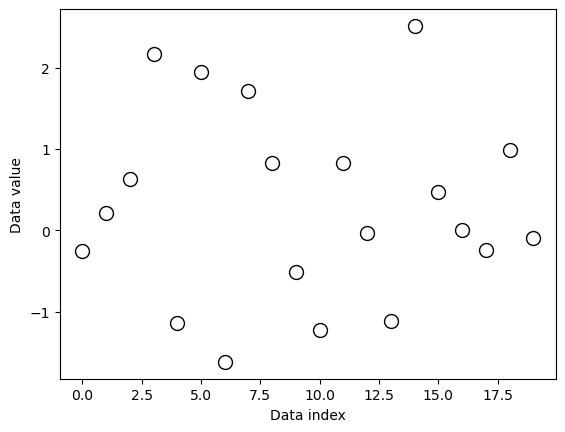

In [66]:
N = 20
pop_mu = 0.5
data = np.random.randn(N) + pop_mu

plt.plot(data, 'ko', markerfacecolor='w', markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')

plt.show()

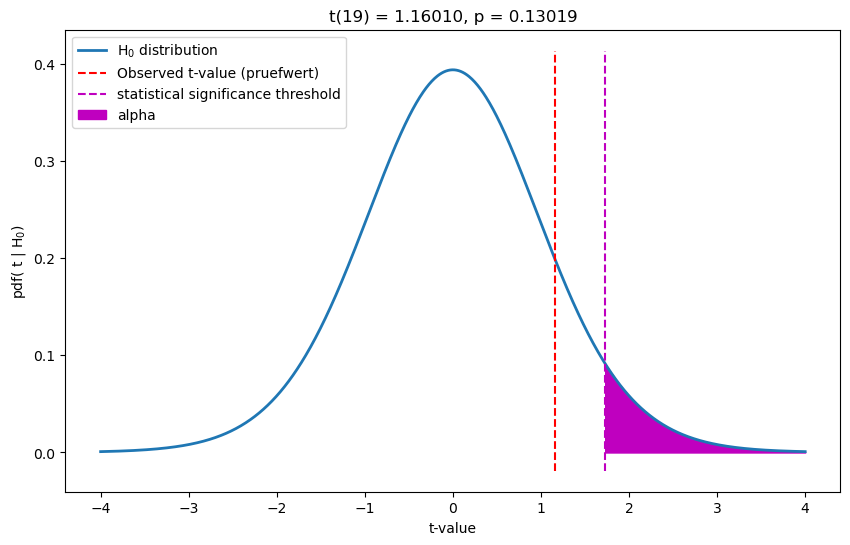

In [68]:
h0_val = 0
t_num = np.mean(data) - h0_val
t_den = np.std(data, ddof=1) / np.sqrt(N)
t_val = t_num / t_den

df = N - 1
p_val = 1 - stats.t.cdf(abs(t_val), df)

x = np.linspace(-4, 4, 1001)
t_dist = stats.t.pdf(x, df) #* np.mean(np.diff(x))

alpha_val = 1 - 0.05
alpha_t = stats.t.ppf(alpha_val, df)

t_val_fill = np.linspace(alpha_t, np.max(x), len(t_dist))
t_dist_fill = stats.t.pdf(t_val_fill, df)

plt.figure(figsize=(10, 6))

plt.plot(x, t_dist, linewidth=2)
y_lim = plt.ylim()

plt.plot([t_val, t_val], y_lim, 'r--')
plt.plot([alpha_t, alpha_t], y_lim, 'm--')
plt.fill_between(t_val_fill, t_dist_fill, color='m')
plt.legend(['H$_0$ distribution', 'Observed t-value (pruefwert)', 'statistical significance threshold', 'alpha'])
plt.xlabel('t-value')
plt.ylabel('pdf( t | H$_0$)')
plt.title(f't({df}) = {t_val:.5f}, p = {p_val:.5f}')

plt.show()

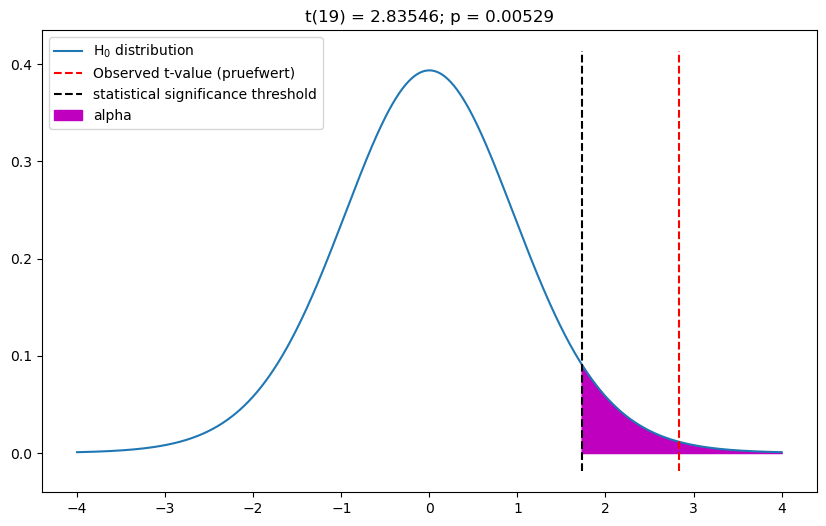

In [61]:
t, p = stats.ttest_1samp(data, h0_val, alternative='greater')
df = len(data) - 1
x = np.linspace(-4, 4, 1001)
t_dist = stats.t.pdf(x, df)

t_val_fill = np.linspace(alpha_t, np.max(x), len(t_dist))
t_dist_fill = stats.t.pdf(t_val_fill, df)

plt.figure(figsize=(10, 6))

plt.plot(x, t_dist)
y_lim = plt.ylim()

plt.plot([t, t], y_lim, 'r--')
plt.plot([alpha_t, alpha_t], y_lim, 'k--')
plt.fill_between(t_val_fill, t_dist_fill, color='m')
plt.legend(['H$_0$ distribution', 'Observed t-value (pruefwert)', 'statistical significance threshold', 'alpha'])
plt.title(f't({df}) = {t:.5f}; p = {p:.5f}')

plt.show()

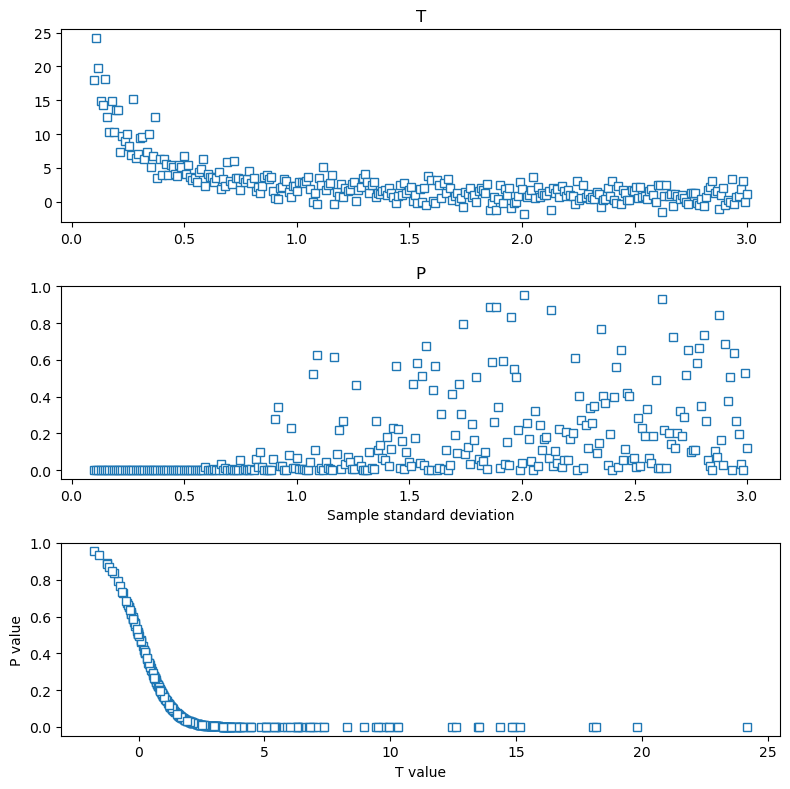

In [69]:
N = 20
h0_val = 0
df = N - 1
num_rep = 300
pop_mu = 0.5
pop_std = np.linspace(0.1, 3, num_rep)
data = np.ones((num_rep, N))
t_vals = np.ones(num_rep)
p_vals = np.ones(num_rep)

for i in range(num_rep):
    data[i] = pop_std[i] * np.random.randn(N) + pop_mu
    t_vals[i], p_vals[i] = stats.ttest_1samp(data[i], h0_val, alternative='greater')

fig, ax = plt.subplots(3, 1, figsize=(8, 8))

ax[0].plot(pop_std, t_vals, 's', markerfacecolor='w')
ax[0].set_title('T')

ax[1].plot(pop_std, p_vals, 's', markerfacecolor='w')
ax[1].set_title('P')
ax[1].set_xlabel('Sample standard deviation')

ax[2].plot(t_vals, p_vals, 's', markerfacecolor='w')
ax[2].set_xlabel('T value')
ax[2].set_ylabel('P value')

plt.tight_layout()
plt.show()

In [ ]:
t_vals[-1:-10:-1], p_vals[-1:-10:-1]